# ***BREAKING THE hCAPTCHA USING CONVOLUTIONAL NEURAL NETWORK (CNN)***

# **I. INTRODUCTION**

Hello! Welcome to my Notebook.

Notebook ini merupakan bagian dari tugas *Milestone 2 Phase 2* yang dibuat oleh **Asta Zeska Dimitri** dari **Batch 001-HCK**.

## I.1. Background

CAPTCHA (Completely Automated Public Turing test to tell Computers and Humans Apart) adalah jenis tindakan keamanan yang dikenal sebagai autentikasi tantangan-tanggapan pada sebuah website untuk memastikan bahwa website tersebut diakses oleh manusia bukan robot. Berikut adalah beberapa jenis captcha yang sering kita jumpai dalam sebuah website:
- Text CAPTCHA
- Picture Recognition CAPTCHA
- Math CAPTCHA
- ReCAPTCHA Google
- 3D CAPTCHA
- Audio CAPTCHA
- jQuery slider CAPTCHA

Captcha biasanya sering ditemukan pada website-website yang menyimpan data pribadi sensitif, seperti marketplace, layanan perbankan, institusi pemerintah, korporat, dan lain sebagainya. Namun sekarang ini banyak ditemukan juga beberapa website sederhana yang ikut memasang captcha, hal ini tentu bisa dianggap menyebalkan untuk sebagian pengunjung website tersebut. Dan juga ada beberapa pekerjaan yang memang perlu mengakses suatu website berkali-kali, sebagai contoh credit analyst di perusahaan finance perlu mengecek skor kredit nasabah di website Sistem Informasi Debitur yang dikelola oleh BI dan OJK. Jumlah nasabah yang harus dicek tiap harinya tentu tidak sedikit, dan setiap pengecekan harus selalu melewati tes captcha terlebih dahulu. Disini posisi captcha bisa dikatakan sebagai faktor penghambat pekerjaan tersebut. Dan seiring dengan berkembangnya teknologi komputer, beberapa jenis captcha sudah bisa dipecahkan dengan menggunakan bantuan Artificial Intelligence seperti Machine Learning dan Deep Learning. 

## I.2. Problem Statement

Dengan semakin banyaknya penggunaan captcha pada website bahkan untuk hal-hal sederhana seperti mengecek ongkos kirim, ditambah juga dengan adanya beberapa pekerjaan yang memang perlu mengakses suatu website berkali-kali seperti contoh di atas, maka diperlukan adanya suatu solusi yang bisa memudahkan kita 'melompati' proses tes captcha tersebut agar pekerjaan yang dilakukan bisa lebih efisien lagi.

## I.3. Objective

Membuat model Deep Learning dengan motede Convolutional Neural Network (CNN) untuk membantu proses identifikasi gambar captcha dengan tujuan memudahkan proses suatu pekerjaan yang membutuhkan akses yang sangat sering ke website yang menggunakan captcha.

# **II. IMPORT LIBRARIES**

Memasukkan semua library yang akan digunakan dalam pengolahan data kali ini.

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import random
import PIL
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import itertools
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

np.random.seed(39)
tf.random.set_seed(39)

# **III. DATA LOADING AND EXPLORATORY**

Data yang digunakan merupakan data gambar Picture Recognition Captcha. Berikut adalah link dari dataset yang digunakan: https://www.kaggle.com/datasets/aneeshtickoo/hcaptcha-dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.chdir('/content/gdrive/My Drive/captcha/')
os.listdir()

['test', 'train', 'val']

In [ ]:
train_folder = r'train/'
val_folder = r'val/'
test_folder = r'test/'

In [ ]:
train_dir = pathlib.Path(train_folder)
val_dir = pathlib.Path(val_folder)
test_dir = pathlib.Path(test_folder)

train_count = len(list(train_dir.glob('*/*.jpg')))
val_count = len(list(val_dir.glob('*/*.jpg')))
test_count = len(list(test_dir.glob('*/*.jpg')))

print('Number of images in training folder: ', train_count)
print('Number of images in validation folder: ', val_count)
print('Number of images in validation folder: ', test_count)

Number of images in training folder:  2925
Number of images in validation folder:  729
Number of images in validation folder:  414


In [ ]:
labels = os.listdir('./train')
print(labels)

['bicycle', 'boat', 'motorbus', 'motorcycle', 'seaplane', 'train', 'truck', 'airplane']


In [ ]:
names=[]
num_train=[]
num_val=[]
num_test=[]
num_total = []

for name in labels:
    image_count_train = len(os.listdir(f'./train/{name}'))
    image_count_val = len(os.listdir(f'./val/{name}'))
    image_count_test = len(os.listdir(f'./test/{name}'))

    names.append(name)
    num_train.append(image_count_train)
    num_val.append(image_count_val)
    num_test.append(image_count_test)
    num_total.append(image_count_train+image_count_val+image_count_test)
dic = {'Label': names, 'Count_train': num_train, 'Count_val': num_val, 'Count_test': num_test, 'Total': num_total} 
    
df = pd.DataFrame(dic)
df

,Label,Count_train,Count_val,Count_test,Total
0,bicycle,270,67,38,375
1,boat,476,119,67,662
2,motorbus,228,57,32,317
3,motorcycle,527,131,75,733
4,seaplane,256,64,36,356
5,train,218,54,32,304
6,truck,589,147,83,819
7,airplane,361,90,51,502


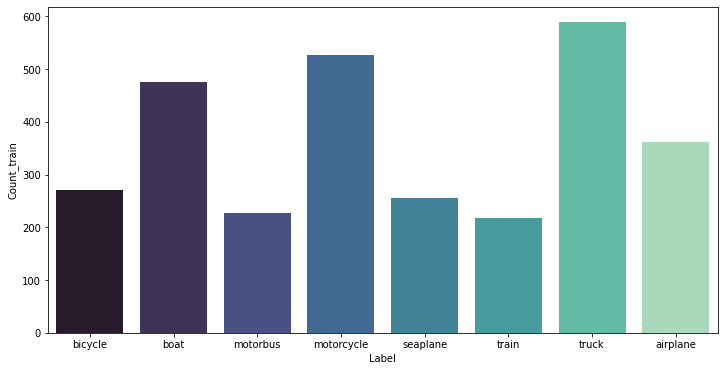

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, y='Count_train', x='Label', palette='mako');

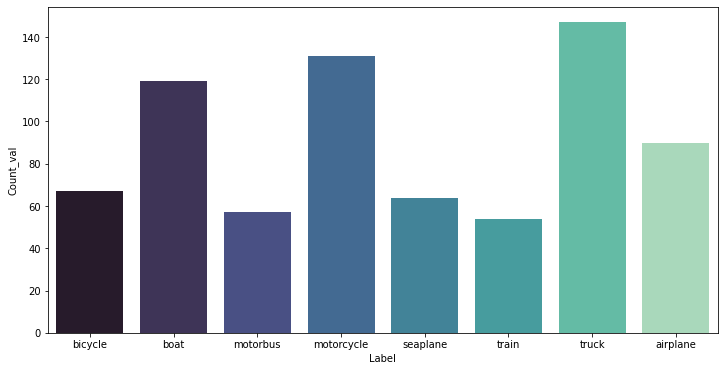

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, y='Count_val', x='Label', palette='mako');

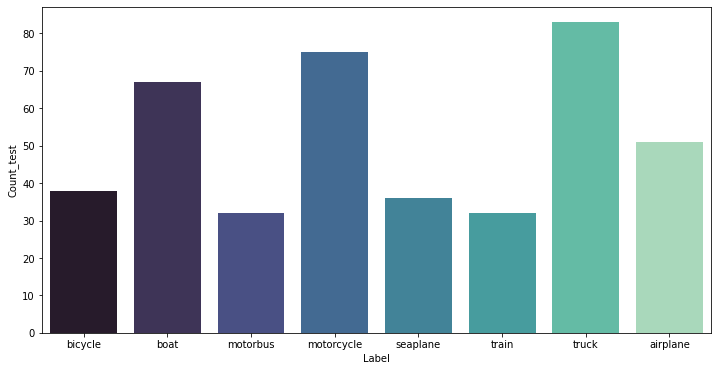

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, y='Count_test', x='Label', palette='mako');

In [ ]:
labels = os.listdir('./train')

size = {}
for label in labels:
    images = os.listdir(f'./train/{label}')
    for image in images:    
        img = plt.imread(f'./train/{label}/{image}')
        if img.shape not in size:
            size[img.shape]=1
        else:
            size[img.shape]+=1

print(size)

{(128, 128, 3): 2840, (144, 144, 3): 85}


Data yang digunakan kali ini adalah data gambar kendaraan dengan jumlah total sebanyak 4068 gambar. Data gambar ini dibagi lagi menjadi 2925 gambar untuk data train, 729 gambar untuk data validation, dan 414 gambar untuk data test. Jumlah label pada data yang digunakan kali ini berjumlah 8 yaitu: Airplane, Bicycle, Boat, Motorbus, Motorcycle, Seaplane, Train, dan Truck. Jumlah gambar pada setiap kelasnya tidak sama atau bisa dikatakan imbalance. Kelas Truk mempunyai jumlah gambar paling banyak dengan jumlah 819 gambar, dan kelas Train mempunyai jumlah gambar paling sedikit dengan jumlah 304 gambar. Proporsi dari tiap data train, validation, dan test-nya dibagi secara merata terlihat pada grafik di atas. Gambar pada dataset ini juga memiliki ukuran yang berbeda, ada yang berukuran 128x128 pixel dan ada yang berukuran 144x144 pixel. Perbedaan ukuran ini nanti akan di-handle pada saat masuk ke bagian Data Preprocessing.

# **IV. DATA PREPROCESSING**

In [ ]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
BATCH_SIZE = 32

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_folder, shuffle=True, batch_size=BATCH_SIZE, image_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2925 files belonging to 8 classes.


In [ ]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(val_folder, batch_size=BATCH_SIZE, image_size=(IMG_HEIGHT, IMG_WIDTH))

Found 729 files belonging to 8 classes.


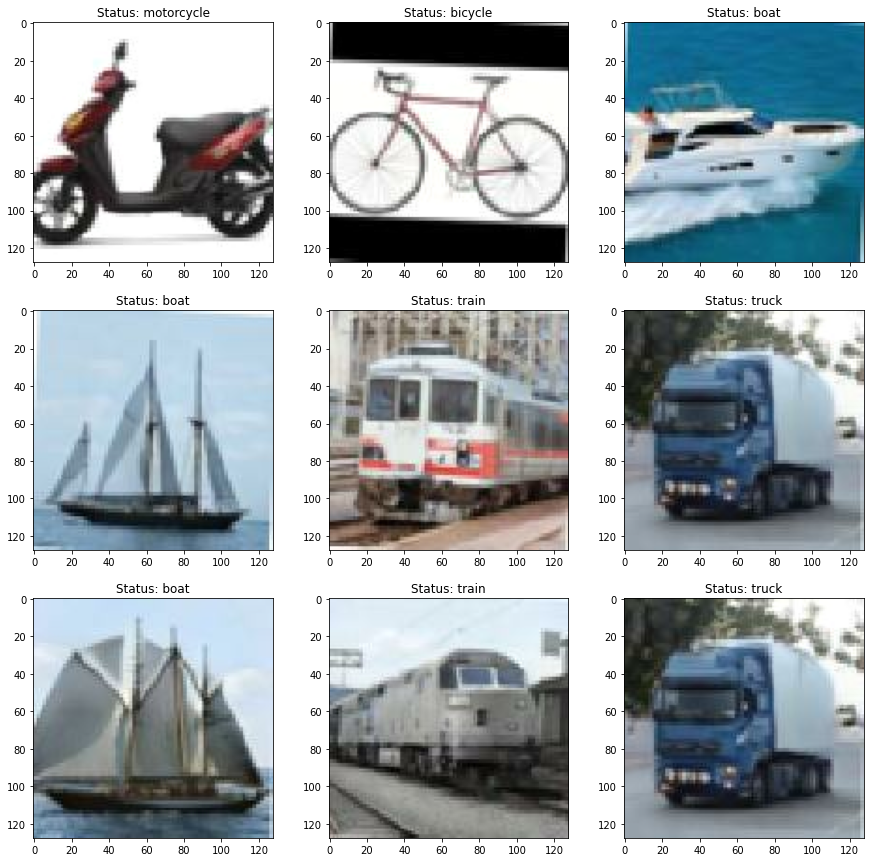

In [ ]:
fig,ax=plt.subplots(3,3)
fig.set_size_inches(15,15)
for next_element in train_dataset:
    x_batch, y_batch = next_element
    for i in range (0,3):
        for j in range(3):
            random_example = np.random.randint(0, BATCH_SIZE)
            ax[i,j].imshow(x_batch[random_example]/250)
            ax[i,j].set_title('Status: '+ train_dataset.class_names[y_batch[random_example].numpy()])
    break

In [ ]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_dataset.cache().shuffle(2000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_dataset))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

0.0 0.9960785


Pada bagian data Preprocessing ini kita menentukan ukuran gambar yang akan masuk ke model yang akan dibuat nantinya. Karena pada analisis kali ini ukuran gambar pada dataset sudah termasuk kecil jadi penulis menggunakan ukuran aslinya yaitu 128x128 pixel, untuk sebagian kecil gambar yang berukuran 144x144 pixel akan otomatis terubah ukurannya menjadi 128x128 pixel. Kemudian digunakan prefetch untuk optimalisasi proses pada saat pembuatan model CNN nantinya. Penulis juga membuat layer normalization yang merupakan layer untuk melakukan scaling dari nilai warnanya yang awalnya bernilai 0-255 menjadi 0-1 untuk memudahkan model untuk mengeneralisir data gambar yang diproses nantinya.

# **V. MODELLING**

## V.1. Base Model

In [ ]:
num_classes = 8

model = Sequential([
    layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
    layers.Conv2D(16, 4, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 4, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 4, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        32832     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

In [ ]:
epochs=20

history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
92/92 [==============================] - 95s 918ms/step - loss: 5.9785 - accuracy: 0.5747 - val_loss: 0.7612 - val_accuracy: 0.7627
Epoch 2/20
92/92 [==============================] - 2s 18ms/step - loss: 0.4885 - accuracy: 0.8414 - val_loss: 0.7497 - val_accuracy: 0.7860
Epoch 3/20
92/92 [==============================] - 2s 17ms/step - loss: 0.3034 - accuracy: 0.8988 - val_loss: 0.4773 - val_accuracy: 0.8669
Epoch 4/20
92/92 [==============================] - 2s 17ms/step - loss: 0.1658 - accuracy: 0.9460 - val_loss: 0.5182 - val_accuracy: 0.8560
Epoch 5/20
92/92 [==============================] - 2s 17ms/step - loss: 0.1018 - accuracy: 0.9644 - val_loss: 0.4770 - val_accuracy: 0.8738
Epoch 6/20
92/92 [==============================] - 2s 17ms/step - loss: 0.0772 - accuracy: 0.9730 - val_loss: 0.6858 - val_accuracy: 0.8519
Epoch 7/20
92/92 [==============================] - 2s 17ms/step - loss: 0.1225 - accuracy: 0.9607 - val_loss: 0.5343 - val_accuracy: 0.8669
Epoch 8/20


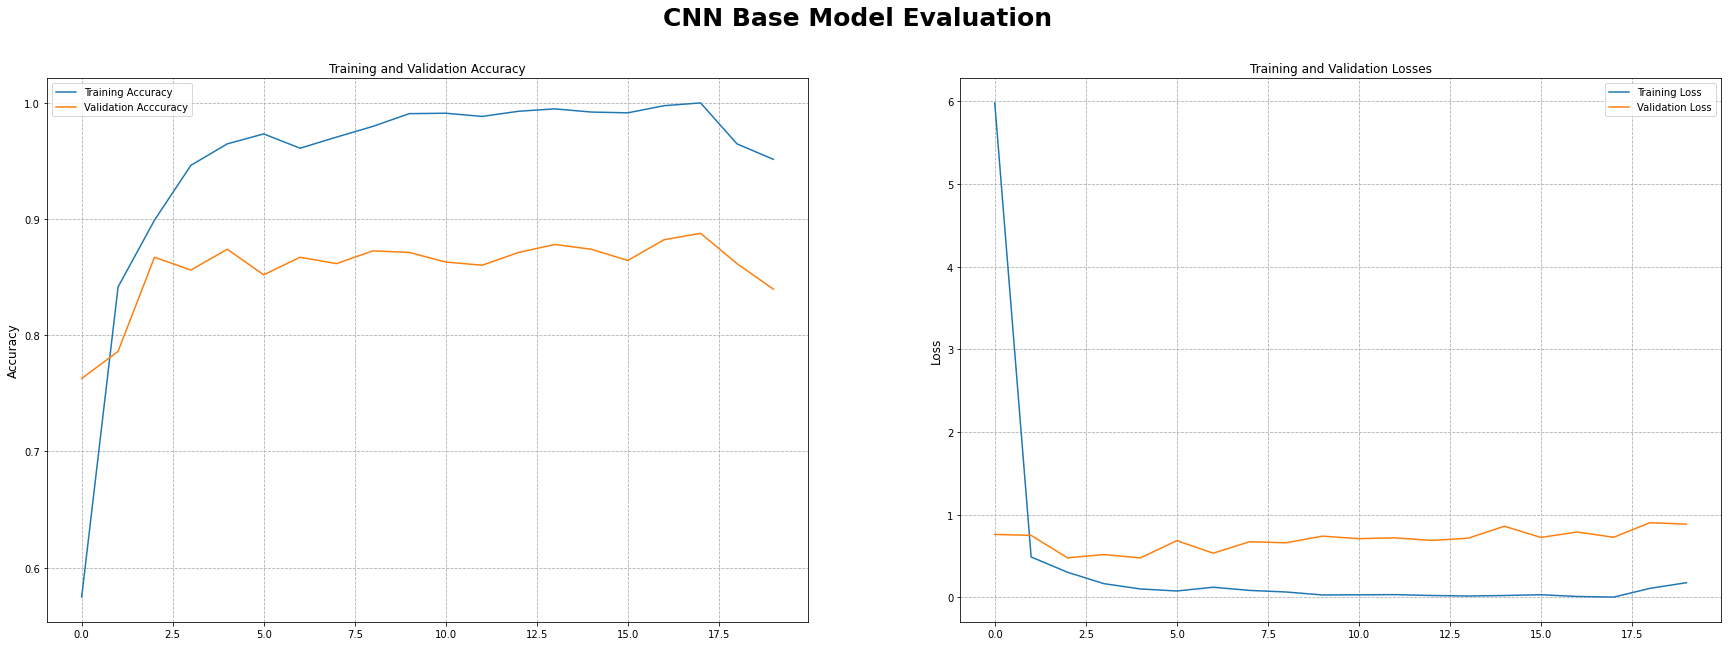

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('CNN Base Model Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history.history['accuracy'],label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Model awal CNN yang dihasilkan di atas masih menggunakan beberapa layer convolution dan pooling ditambah dengan dua layer dense sebagai hidden layer dan juga layer output. Untuk layer convolution menggunakan kernel size 4, activation function yang digunakan adalah Relu, dan di compile dengan optimizer Adam. Didapatkan nilai akurasi yang sangat tinggi bahkan hampir menyentuh 1 pada data train, namun dapat dilihat pada grafik bahwa model yang didapatkan masih cenderung overfit. Model masih butuh dilakukan improvement kedepannya.

## V.2. Model Improvement

In [61]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2, 0.2),
  ]
)

In [62]:
num_classes = 8

model_imp = Sequential([
    layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
    data_augmentation,
    normalization_layer,
    layers.Conv2D(256, 4, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(128, 4, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 4, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.1),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [63]:
model_imp.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 256)     12544     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 256)      0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 64, 64, 256)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 128)       524416    
                                                      

In [64]:
model_imp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=3, restore_best_weights=True)

history_imp = model_imp.fit(train_ds, validation_data=(val_ds), callbacks=early_stop, epochs=30)

Epoch 1/30
92/92 [==============================] - 19s 197ms/step - loss: 1.7569 - accuracy: 0.3532 - val_loss: 1.2748 - val_accuracy: 0.5789
Epoch 2/30
92/92 [==============================] - 19s 209ms/step - loss: 1.1901 - accuracy: 0.5703 - val_loss: 1.1298 - val_accuracy: 0.5720
Epoch 3/30
92/92 [==============================] - 18s 197ms/step - loss: 1.0090 - accuracy: 0.6448 - val_loss: 0.9187 - val_accuracy: 0.6831
Epoch 4/30
92/92 [==============================] - 18s 194ms/step - loss: 0.8576 - accuracy: 0.6954 - val_loss: 0.8461 - val_accuracy: 0.7023
Epoch 5/30
92/92 [==============================] - 18s 196ms/step - loss: 0.7887 - accuracy: 0.7265 - val_loss: 0.6583 - val_accuracy: 0.7819
Epoch 6/30
92/92 [==============================] - 18s 197ms/step - loss: 0.7316 - accuracy: 0.7576 - val_loss: 0.6431 - val_accuracy: 0.7805
Epoch 7/30
92/92 [==============================] - 18s 197ms/step - loss: 0.6582 - accuracy: 0.7703 - val_loss: 0.7260 - val_accuracy: 0.7476

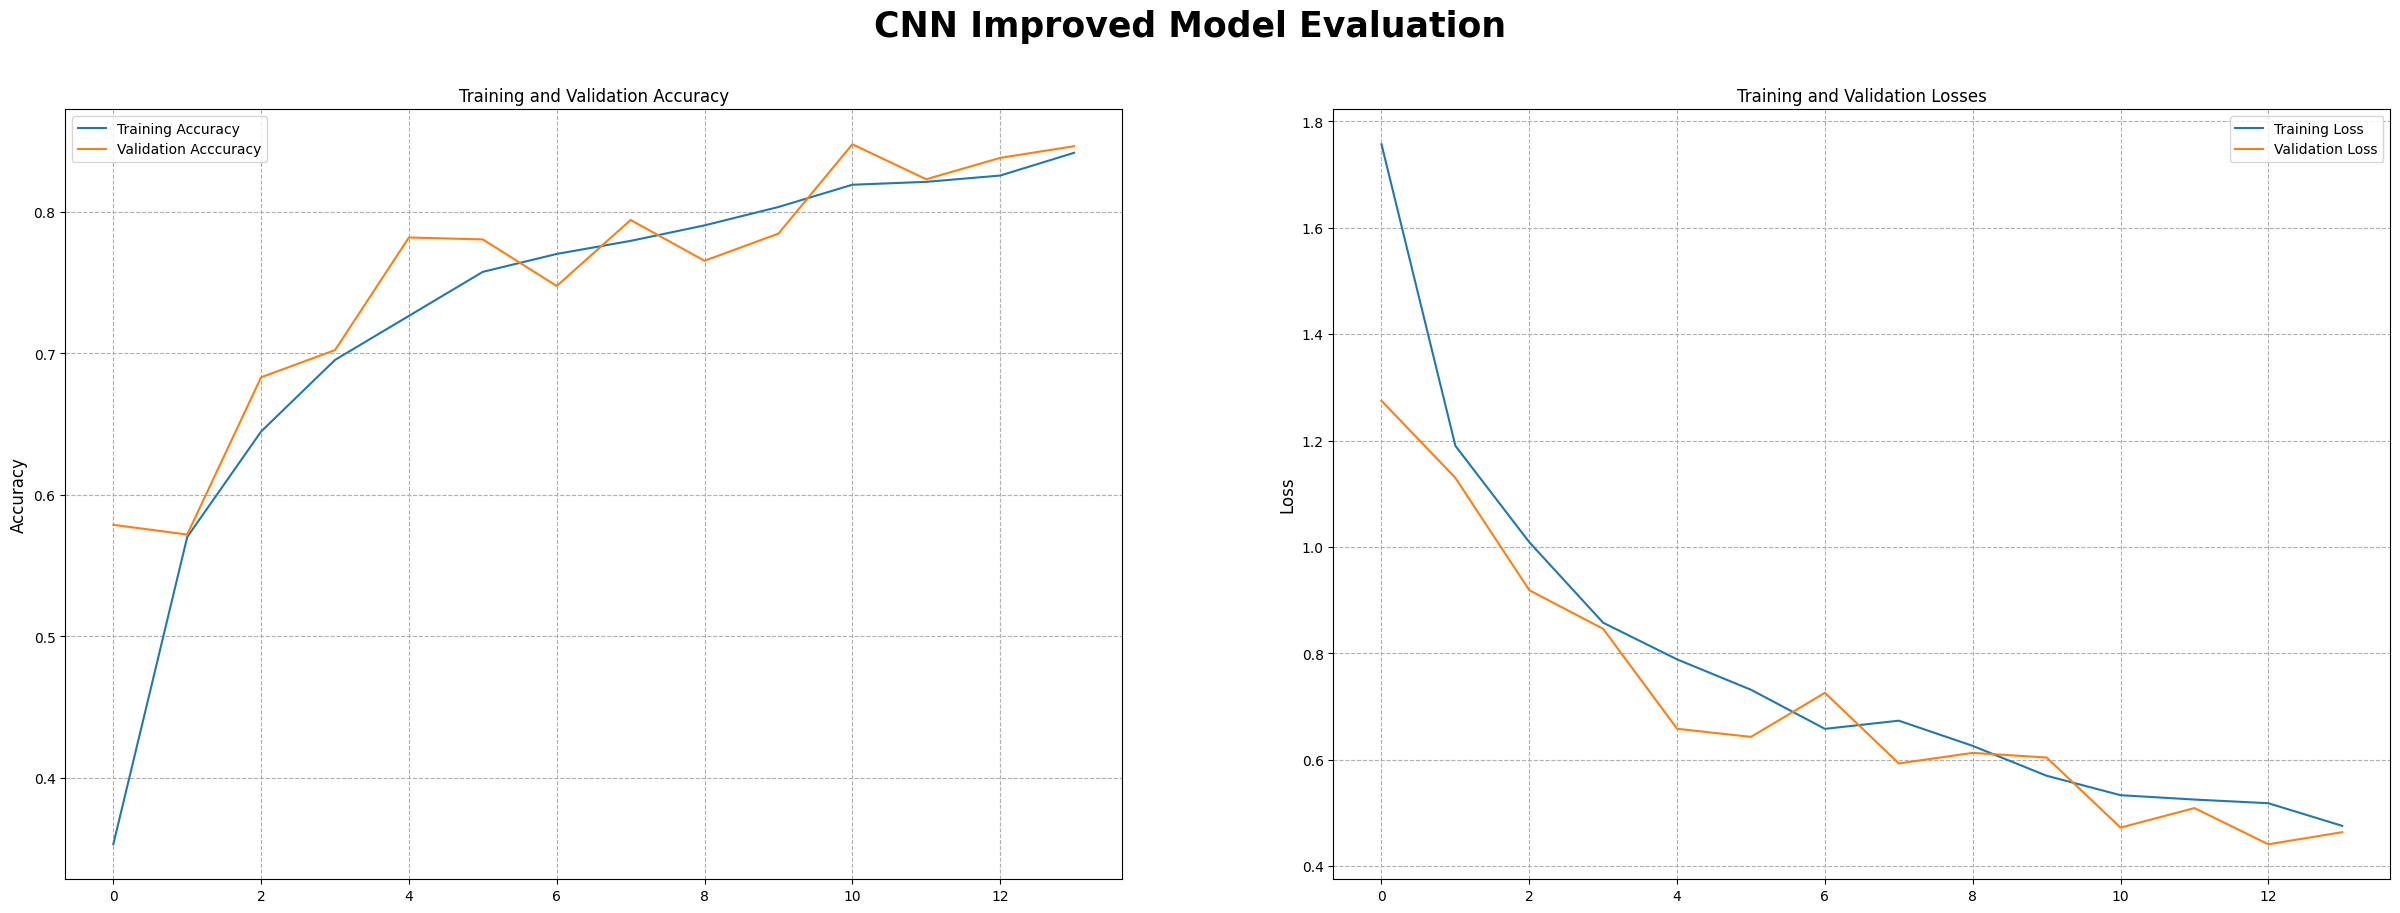

In [65]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('CNN Improved Model Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_imp.history['accuracy'],label="Training Accuracy")
plt.plot(history_imp.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_imp.history['loss'], label="Training Loss")
plt.plot(history_imp.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Berikut adalah hasil improvement dari model CNN yang sebelumnya. Sebagian besar layer yang digunakan masih sama dengan model awal yaitu beberapa layer convolution dan pooling, ditambah 2 layer dense sebagai hidden layer dan output layer. Namun disini penulis menambahkan layer Augmentation, layer normalization dan layer dropout. Layer Augmentation digunakan untuk menambah data train kita karena jumlah data train kita hanya sekitar 2925 gambar saja. Layer augmentation ini menambah data train kita dengan cara memutar dan membalik gambar yang sudah ada, tujuannya adalah agar model memiliki cukup banyak data untuk dipelajari. Layer normalization adalah layer scaling dimana kita mengubah nilai warna gambar dari 0-255 menjadi 0-1, harapannya dengan mengubah nilai warna pada gambar menjadi 0-1 model jadi semakin mudah dalam menggeneralisir gambar pada saat training. Lalu ada layer dropout digunakan karena layer ini akan membantu model mengurangi kecenderungan overfit seperti yang kita temukan pada model awal tadi. Untuk parameter lain cenderung masih sama yaitu activation function yang digunakan adalah Relu dan optimizer yang digunakan adalah Adam hanya saja ditambahkan nilai learning rate pada optimizernya. Lalu perubahan lain yang dilakukan ada pada nilai neuron tiap layernya. Jika melihat dari nilai akurasi yang didapatkan memang terlihat adanya penurunan, namun jika melihat grafik di atas, model setelah improvement ini bisa dikatakan sudah lebih fit jika dibandingkan dengan model awal. 

## V.3. Model Evaluation

In [66]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(test_folder, image_size=(IMG_HEIGHT, IMG_WIDTH))

Found 414 files belonging to 8 classes.


In [67]:
labels = []
predictions = []
for x,y in test_dataset:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model_imp.predict(x),1).numpy())

1/1 [==============================] - 0s 82ms/step


In [68]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [69]:
print("Train Accuracy  : {:.2f} %".format(history_imp.history['accuracy'][-2]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))

Train Accuracy  : 82.56 %
Test Accuracy   : 86.96 %


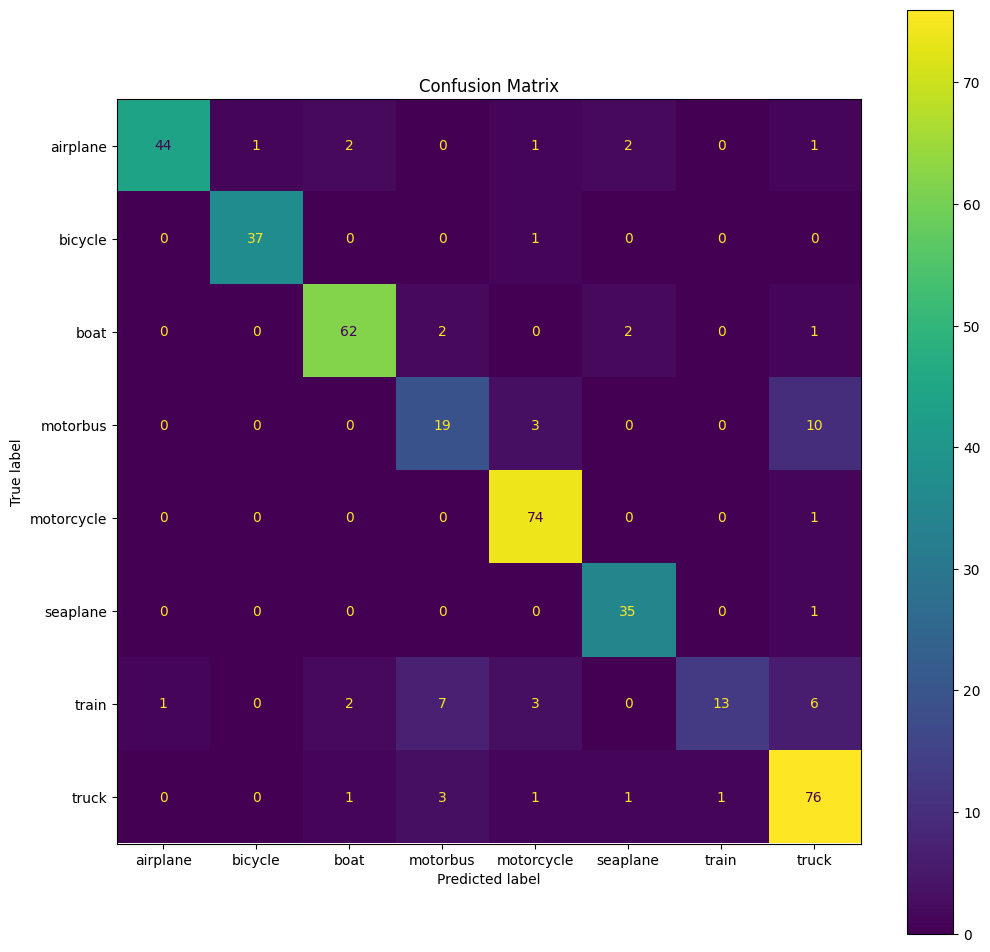

In [70]:
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=test_dataset.class_names)
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

In [71]:
print(classification_report(labels, predictions))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92        51
           1       0.97      0.97      0.97        38
           2       0.93      0.93      0.93        67
           3       0.61      0.59      0.60        32
           4       0.89      0.99      0.94        75
           5       0.88      0.97      0.92        36
           6       0.93      0.41      0.57        32
           7       0.79      0.92      0.85        83

    accuracy                           0.87       414
   macro avg       0.87      0.83      0.84       414
weighted avg       0.88      0.87      0.86       414



Secara keseluruhan didapatkan nilai akurasi data train sebesar 83% dan akurasi data test sebesar 87%. Dan jika melihat dari confusion matrix di atas dapat terlihat bahwa sebagian besar label dapat diidentifikasi dengan tepat dengan kesalahan/error tergolong kecil berdasarkan nilai f1-score-nya. Namun ditemukan adanya dua label yang performanya rendah jika dibandingkan yang lain, label tersebut adalah motorbus dan train. Model yang kita dapatkan masih belum bisa membedakan kedua label ini dengan baik. Untuk label motorbus, model masih sering mengidentifikasinya sebagai label truck. Dan untuk label train, model masih sering mengklasifikasikannya sebagai label motorbus atau label truck. Asumsi penulis hal ini ada kaitannya dengan jumlah data gambar yang dipakai, dimana label motorbus dan train adalah label dengan jumlah data yang paling sedikit jika dibandingkan dengan label lainnya, sehingga model tidak mampu menggeneralisir kedua label ini sebaik label yang lainnya. 

# **VI. MODEL SAVE**

In [73]:
model_imp.save('model_imp.h5')
np.save('history_imp.npy', history_imp.history)

# **VII. MODEL INFERENCE**

In [77]:
# Defining testing image
test_image1 = r'inference/truck.jpg'
test_image2 = r'inference/airplane.jpg'
test_image3 = r'inference/bicycle.jpg'
test_image4 = r'inference/motorcycle.jpg'
test_image5 = r'inference/boat.jpg'
test_image6 = r'inference/motorbus.jpg'
test_image7 = r'inference/seaplane.jpg'
test_image8 = r'inference/train.jpg'

# Image predict
img1 = keras.preprocessing.image.load_img(test_image1, target_size=(IMG_HEIGHT, IMG_WIDTH))
img2 = keras.preprocessing.image.load_img(test_image2, target_size=(IMG_HEIGHT, IMG_WIDTH))
img3 = keras.preprocessing.image.load_img(test_image3, target_size=(IMG_HEIGHT, IMG_WIDTH))
img4 = keras.preprocessing.image.load_img(test_image4, target_size=(IMG_HEIGHT, IMG_WIDTH))
img5 = keras.preprocessing.image.load_img(test_image5, target_size=(IMG_HEIGHT, IMG_WIDTH))
img6 = keras.preprocessing.image.load_img(test_image6, target_size=(IMG_HEIGHT, IMG_WIDTH))
img7 = keras.preprocessing.image.load_img(test_image7, target_size=(IMG_HEIGHT, IMG_WIDTH))
img8 = keras.preprocessing.image.load_img(test_image8, target_size=(IMG_HEIGHT, IMG_WIDTH))

1/1 [==============================] - 0s 16ms/step


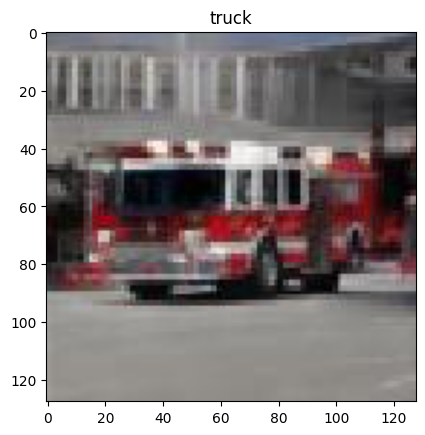

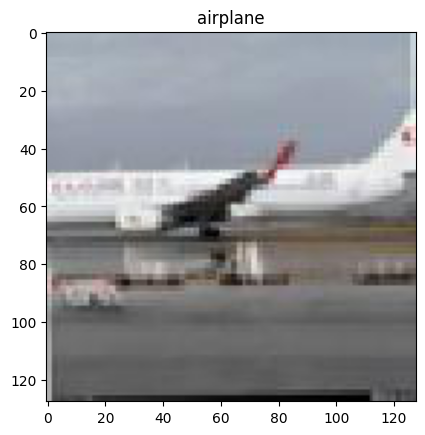

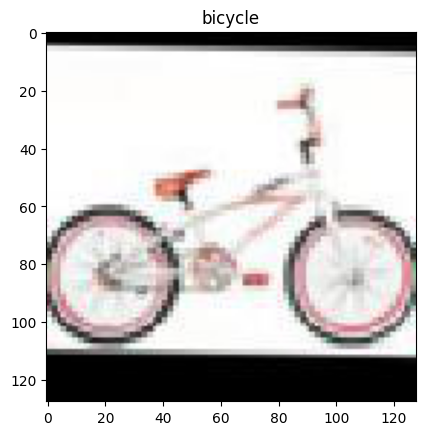

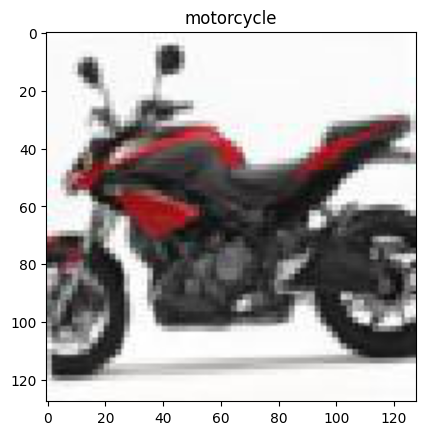

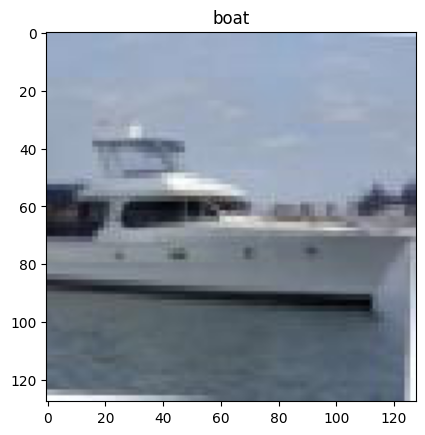

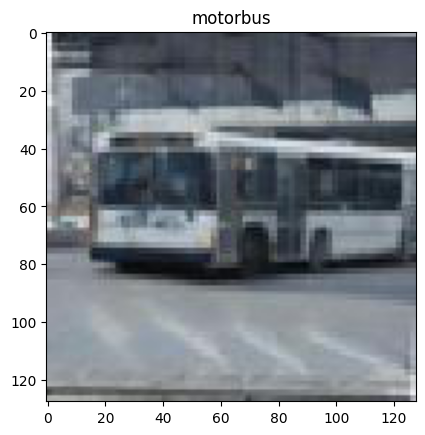

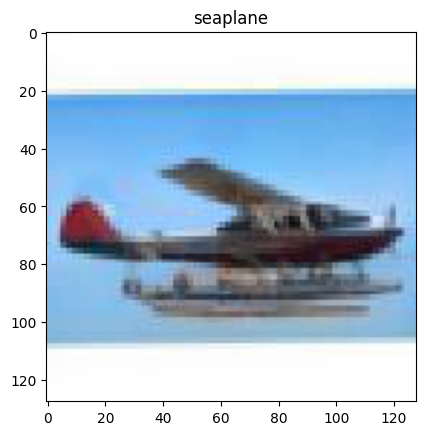

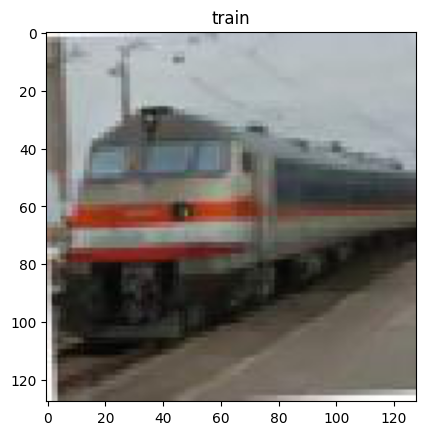

In [78]:
images = [img1, img2, img3, img4, img5, img6, img7, img8]

for img in images:
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)

  predictions = model_imp.predict(img_array)
  score = tf.nn.softmax(predictions[0]) 

  plt.figure()
  plt.imshow(img)
  plt.title(test_dataset.class_names[np.argmax(score)])

Model yang dibuat sudah mampu melakukan prediksi terhadap data inference yang belum pernah dilihat sebelumnya.

# **VIII. CONCLUSIONS**

Telah berhasil dibuat model Convolutional Neural Network (CNN) untuk membantu proses identifikasi gambar captcha dengan nilai akurasi yang cukup baik yaitu sekitar 87%. Namun karena data gambar yang dimiliki memiliki jumlah yang tidak seimbang untuk tiap labelnya maka kita juga perlu melihat metric lainnya seperti f-1 score, dimana sebagian besar label sudah memiliki nilai f1-score yang cukup baik walaupun masih ditemukan juga label dengan nilai f1-score yang masih jauh dari kata memuaskan. Berikut untuk detail nilai metric yang didapatkan tiap labelnya:

| Label      | f1-score |
|------------|----------|
| airplane   | 0.92     |
| bicycle    | 0.97     |
| boat       | 0.93     |
| motorbus   | 0.60     |
| motorcycle | 0.94     |
| seaplane   | 0.92     |
| train      | 0.57     |
| truck      | 0.85     |

Kita menggunakan f1-score karena f1-score bergantung kepada nilai precision dan juga nilai recall. Jadi ketika nilai precision dan recallnya tinggi maka nilai f1-scorenya akan ikut tinggi juga, karena dalam identifikasi gambar kita ingin meminimalisir error false positive dan juga false negative. Dari tabel di atas dapat terlihat bahwa enam label sudah memiliki nilai f1-score yang cukup bagus, label tersebut adalah airplane, bicycle, boat, motorcycle, seaplane, dan truck. Dan ditemukan adanya dua label dengan nilai f1-score yang masih rendah yaitu label motorbus dan train. Dengan kata lain model CNN yang dibuat masih lemah dalam melakukan identifikasi motorbus dan juga train. Menurut penulis hal ini dipengaruhi oleh jumlah gambar dari kedua label ini yang lebih sedikit dibandingkan dengan jumlah gambar pada label yang lain.

Tentunya masih banyak yang bisa diperbaiki dari model yang didapatkan pada analisis kali ini. Beberapa hal yang mungkin bisa dicoba untuk analisis selanjutnya adalah:
1. Mencari data tambahan terutama untuk dua label yang nilai f1-scorenya masih rendah
2. Melakukan model improvement menggunakan pre-train model
